# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&units={units}&q={city}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
    
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bilibino
Processing Record 2 of Set 1 | edinburgh of the seven seas
Processing Record 3 of Set 1 | sao bento do sul
Processing Record 4 of Set 1 | lata
Processing Record 5 of Set 1 | aasiaat
Processing Record 6 of Set 1 | ramapuram
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | tazovsky
Processing Record 9 of Set 1 | qaqortoq
Processing Record 10 of Set 1 | ahau
City not found. Skipping...
Processing Record 11 of Set 1 | maughold
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | emerald
Processing Record 15 of Set 1 | inyonga
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | fort bragg
Processing Record 18 of Set 1 | sandnessjoen
Processing Record 19 of Set 1 | grytviken
Processing Record 20 of Set 1 | petropavlovsk-kamchatsky
Processing Record 21 of Set 1 | port al

Processing Record 40 of Set 4 | sechura
Processing Record 41 of Set 4 | lucapa
Processing Record 42 of Set 4 | port elizabeth
Processing Record 43 of Set 4 | isafjordur
Processing Record 44 of Set 4 | as samawah
Processing Record 45 of Set 4 | tantou
Processing Record 46 of Set 4 | tobol'sk
Processing Record 47 of Set 4 | moussoro
Processing Record 48 of Set 4 | ouellah
City not found. Skipping...
Processing Record 49 of Set 4 | yuzhno-kurilsk
Processing Record 0 of Set 5 | hermanus
Processing Record 1 of Set 5 | fisterra
Processing Record 2 of Set 5 | whitehorse
Processing Record 3 of Set 5 | fonadhoo
City not found. Skipping...
Processing Record 4 of Set 5 | moia
Processing Record 5 of Set 5 | nyuzen
Processing Record 6 of Set 5 | tanki leendert
City not found. Skipping...
Processing Record 7 of Set 5 | necochea
Processing Record 8 of Set 5 | misratah
Processing Record 9 of Set 5 | samarinda
Processing Record 10 of Set 5 | ouargla
Processing Record 11 of Set 5 | conde
Processing Reco

Processing Record 31 of Set 8 | yarm
Processing Record 32 of Set 8 | tukrah
Processing Record 33 of Set 8 | plettenberg bay
Processing Record 34 of Set 8 | fort stockton
Processing Record 35 of Set 8 | luganville
Processing Record 36 of Set 8 | trincomalee
Processing Record 37 of Set 8 | vangaindrano
Processing Record 38 of Set 8 | amga
Processing Record 39 of Set 8 | kuanda
Processing Record 40 of Set 8 | chake chake
Processing Record 41 of Set 8 | aioun
Processing Record 42 of Set 8 | jackson
Processing Record 43 of Set 8 | lhokseumawe
Processing Record 44 of Set 8 | pangody
Processing Record 45 of Set 8 | berwick-upon-tweed
Processing Record 46 of Set 8 | kharan
Processing Record 47 of Set 8 | mugia
Processing Record 48 of Set 8 | ishigaki
Processing Record 49 of Set 8 | saurimo
Processing Record 0 of Set 9 | skeldon
Processing Record 1 of Set 9 | enshi
Processing Record 2 of Set 9 | bam
Processing Record 3 of Set 9 | abbeville
Processing Record 4 of Set 9 | mhamid
Processing Record

Processing Record 19 of Set 12 | tozkhurmato
Processing Record 20 of Set 12 | muranovo
Processing Record 21 of Set 12 | hami
Processing Record 22 of Set 12 | fale old settlement
Processing Record 23 of Set 12 | orda
Processing Record 24 of Set 12 | nantucket
Processing Record 25 of Set 12 | bonthe
Processing Record 26 of Set 12 | merritt
Processing Record 27 of Set 12 | cabrero
Processing Record 28 of Set 12 | buedu
Processing Record 29 of Set 12 | nova vicosa
Processing Record 30 of Set 12 | revda
Processing Record 31 of Set 12 | belley
Processing Record 32 of Set 12 | island harbour
Processing Record 33 of Set 12 | sofia
Processing Record 34 of Set 12 | kayyerkan
Processing Record 35 of Set 12 | durban
Processing Record 36 of Set 12 | novyy urgal
Processing Record 37 of Set 12 | orhei
Processing Record 38 of Set 12 | yuci
Processing Record 39 of Set 12 | san antonio del estrecho
City not found. Skipping...
Processing Record 40 of Set 12 | cam ranh
Processing Record 41 of Set 12 | ask

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bilibino,68.0546,166.4372,-11.13,92,100,1.26,RU,1681842728
1,edinburgh of the seven seas,-37.0676,-12.3116,15.01,60,81,5.87,SH,1681842728
2,sao bento do sul,-26.2503,-49.3786,16.65,99,100,0.64,BR,1681842728
3,lata,40.1629,-8.3327,25.51,46,63,1.22,PT,1681842728
4,aasiaat,68.7098,-52.8699,-4.27,88,100,4.21,GL,1681842729


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bilibino,68.0546,166.4372,-11.13,92,100,1.26,RU,1681842728
1,edinburgh of the seven seas,-37.0676,-12.3116,15.01,60,81,5.87,SH,1681842728
2,sao bento do sul,-26.2503,-49.3786,16.65,99,100,0.64,BR,1681842728
3,lata,40.1629,-8.3327,25.51,46,63,1.22,PT,1681842728
4,aasiaat,68.7098,-52.8699,-4.27,88,100,4.21,GL,1681842729


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

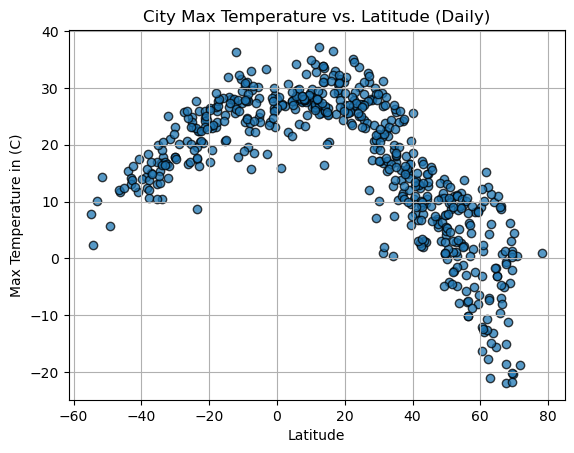

In [8]:
# Build scatter plot for latitude vs. temperature
y_axis = city_data_df['Max Temp']
x_axis = city_data_df['Lat']

plt.scatter(x_axis, y_axis, edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Max Temperature in (C)")
plt.xlabel("Latitude")
plt.title("City Max Temperature vs. Latitude (Daily)")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

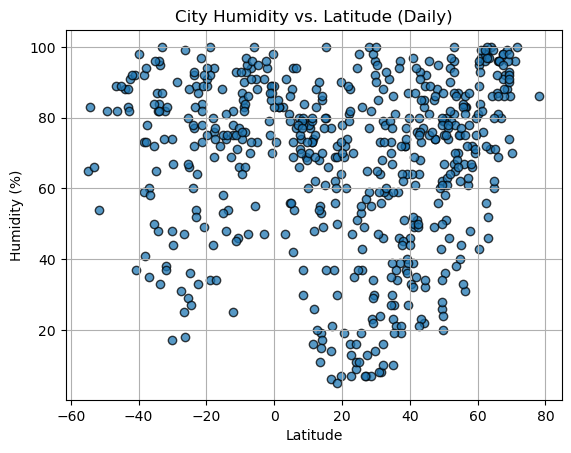

In [9]:
# Build the scatter plots for latitude vs. humidity
y_axis = city_data_df['Humidity']
x_axis = city_data_df['Lat']

plt.scatter(x_axis, y_axis, edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.title("City Humidity vs. Latitude (Daily)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

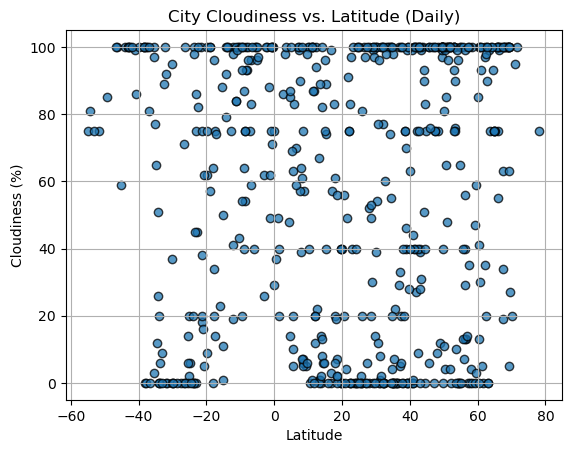

In [10]:
# Build the scatter plots for latitude vs. cloudiness
y_axis = city_data_df['Cloudiness']
x_axis = city_data_df['Lat']

plt.scatter(x_axis, y_axis, edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.title("City Cloudiness vs. Latitude (Daily)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

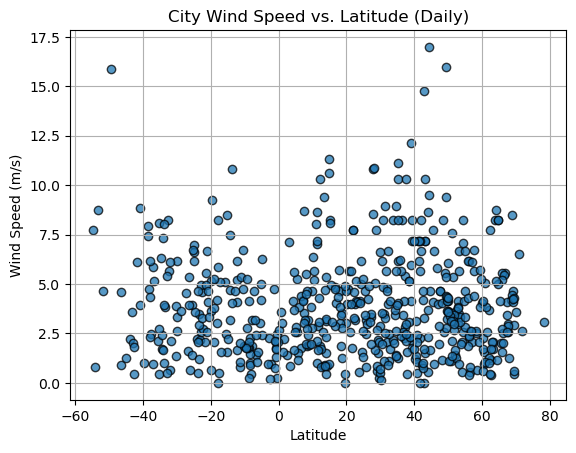

In [11]:
# Build the scatter plots for latitude vs. wind speed
y_axis = city_data_df['Wind Speed']
x_axis = city_data_df['Lat']

plt.scatter(x_axis, y_axis, edgecolors = 'black', alpha = 0.75)

# Incorporate the other graph properties
plt.grid()
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.title("City Wind Speed vs. Latitude (Daily)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE


IndentationError: expected an indented block (2842185235.py, line 5)

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] > 0].reset_index()

# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,bilibino,68.0546,166.4372,-11.13,92,100,1.26,RU,1681842728
1,3,lata,40.1629,-8.3327,25.51,46,63,1.22,PT,1681842728
2,4,aasiaat,68.7098,-52.8699,-4.27,88,100,4.21,GL,1681842729
3,5,ramapuram,13.1167,79.2000,25.59,68,1,0.88,IN,1681842729
4,7,tazovsky,67.4667,78.7000,-15.00,91,63,4.10,RU,1681842729


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0].reset_index()

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,1,edinburgh of the seven seas,-37.0676,-12.3116,15.01,60,81,5.87,SH,1681842728
1,2,sao bento do sul,-26.2503,-49.3786,16.65,99,100,0.64,BR,1681842728
2,6,arraial do cabo,-22.9661,-42.0278,25.98,89,75,2.57,BR,1681842729
3,11,port-aux-francais,-49.3500,70.2167,5.73,82,85,15.87,TF,1681842731
4,12,emerald,-23.5333,148.1667,17.41,92,0,3.50,AU,1681842731


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.8607785015188718


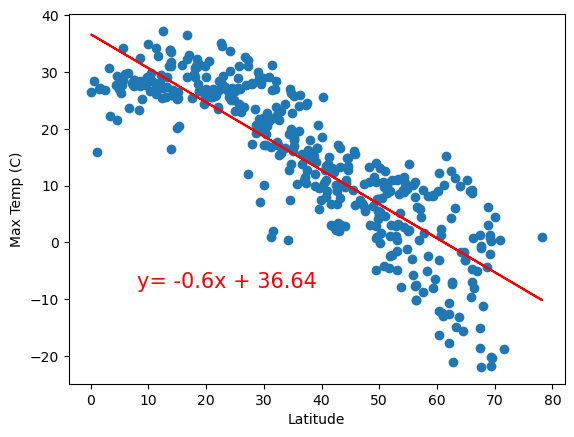

In [25]:
# Linear regression on Northern Hemisphere

# gathering values for x and y axis
y_var = northern_hemi_df['Max Temp']
x_var = northern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (8, -8), color = "red", size = 15)
plt.show()


The r-value is : 0.7922485816298024


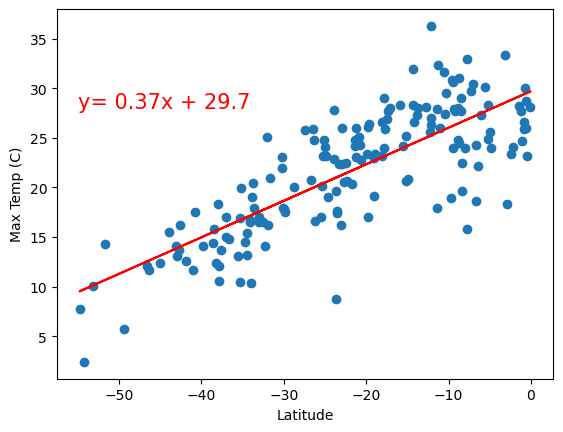

In [26]:
# Linear regression on Southern Hemisphere

# gathering values for x and y axis
y_var = southern_hemi_df['Max Temp']
x_var = southern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Max Temp (C)')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (-55, 28), color = "red", size = 15)
plt.show()

**Discussion about the linear relationship:** There is a strong correlation (r-values close to 1) between a City's Max Temp (maximum temperature, the dependent variable) vs Latitude (the independent variable). For cities located in the northern hemispeshere, the correlation is negative; as latitude increases (the further away a city is from the equator), maximum temperature decreases (it gets colder). It is the opposite for cities in the southern hemisphere, the correlation is positive; as latitude increases (the closer a city is to the equator), maximum temperature increases (it gets warmer).

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.2629662333355038


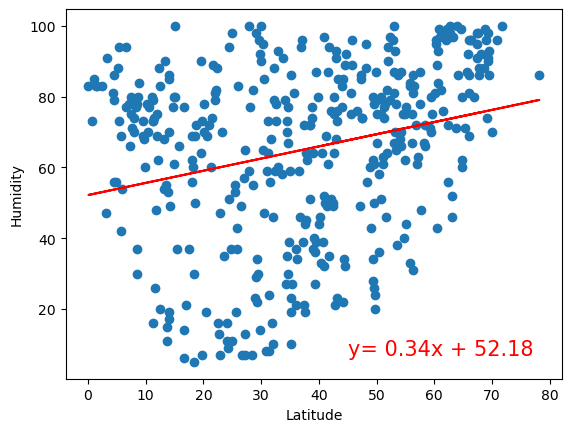

In [27]:
# Northern Hemisphere

# gathering values for x and y axis
y_var = northern_hemi_df['Humidity']
x_var = northern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (45, 7), color = "red", size = 15)
plt.show()

The r-value is : 0.13462517456913303


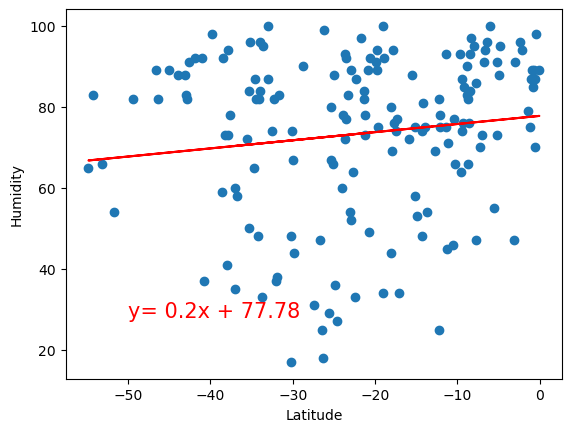

In [28]:
# Southern Hemisphere

# gathering values for x and y axis
y_var = southern_hemi_df['Humidity']
x_var = southern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (-50, 28), color = "red", size = 15)
plt.show()

**Discussion about the linear relationship:** Even though there is a positive correlation between a city's Humidity and Latitude, regardless of which hemisphere they are situated in, the correlation is not strong (according to the r-values). 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.19757726543651047


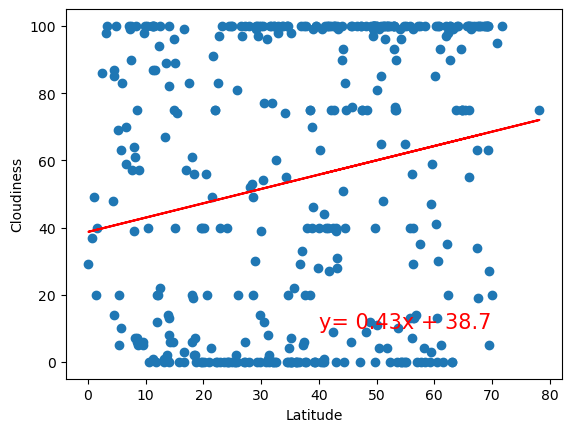

In [29]:
# Northern Hemisphere

# gathering values for x and y axis
y_var = northern_hemi_df['Cloudiness']
x_var = northern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (40, 10), color = "red", size = 15)
plt.show()

The r-value is : 0.15304547421256037


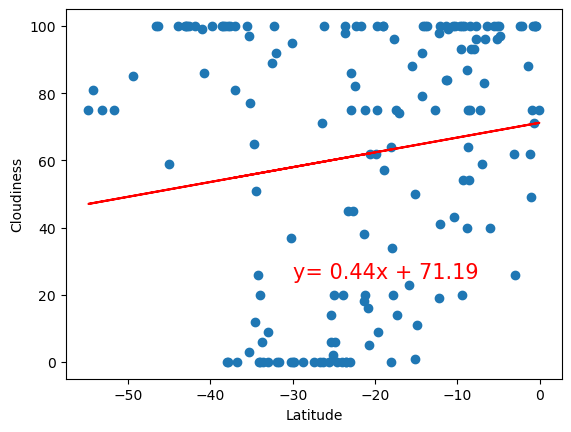

In [30]:
# Southern Hemisphere

# gathering values for x and y axis
y_var = southern_hemi_df['Cloudiness']
x_var = southern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (-30, 25), color = "red", size = 15)
plt.show()

**Discussion about the linear relationship:** Similarly to Humidity vs. Latitude, even thought there is a positive correlation between a city's Cloudiness and its Latitude, regardless of which hemisphere it is situated in, the correlation is not strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.008682705564834522


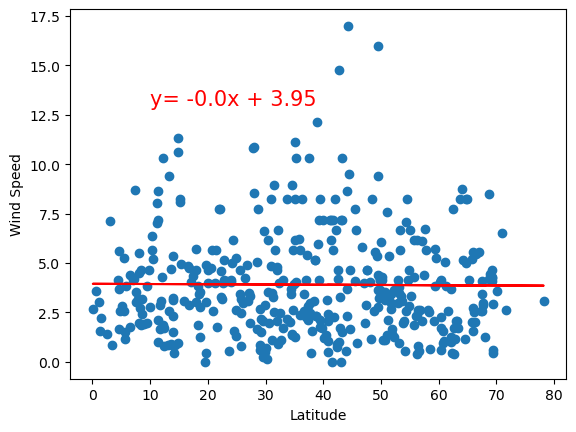

In [33]:
# Northern Hemisphere

# gathering values for x and y axis
y_var = northern_hemi_df['Wind Speed']
x_var = northern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (10, 13), color = "red", size = 15)
plt.show()

The r-value is : -0.008682705564834522


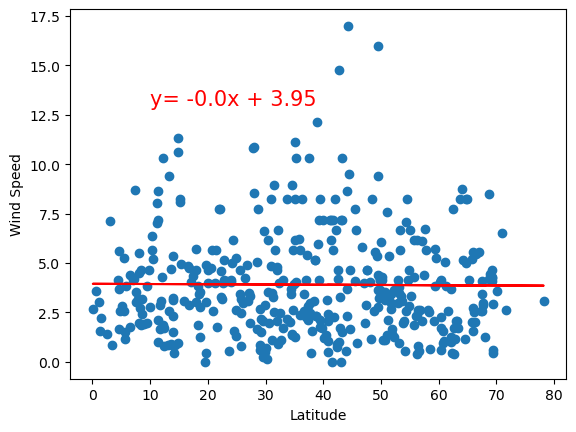

In [32]:
# Southern Hemisphere

# gathering values for x and y axis
y_var = northern_hemi_df['Wind Speed']
x_var = northern_hemi_df['Lat']

# linear regression on x and y variables, and calculating "line of best fit"
slope, intr, r, p, std_err = linregress(x_var, y_var)
y_fit = slope * x_var + intr
print(f'The r-value is : {r}')

# making a scatter plot and plotting the line of best fit
plt.scatter(x_var, y_var)
plt.plot(x_var, y_fit, color = "red")
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.annotate(f"y= {round(slope, 2)}x + {round(intr, 2)}", (10, 13), color = "red", size = 15)
plt.show()

**Discussion about the linear relationship:** There is no correlation between a city's Wind Speed and its Latitude. 